In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#importing a dataset using read_csv function
nineteen_emissions_df = pd.read_csv('C:/Users/seanf/OneDrive/UCDPA_Data_Analytics/air-pollution-2019.csv')

In [3]:
nineteen_emissions_df

,Area,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
0,_World,97207281.40,71657163.15,5.272669e+08,13568072.79,1.433979e+08,5741293.44,61420591.28
1,Afghanistan,480669.59,327818.55,1.055394e+06,42136.77,2.696026e+05,14917.44,185026.85
2,Albania,23371.85,11538.71,5.095350e+04,2645.76,2.548026e+04,945.79,44259.67
3,Algeria,487160.68,66457.71,7.195098e+05,92518.06,7.095178e+05,69293.18,113819.64
4,American Samoa,245.68,389.74,6.719900e+02,27.00,2.948000e+02,13.72,178.32
...,...,...,...,...,...,...,...,...
211,Vietnam,1177238.84,852061.42,1.170892e+07,226891.68,2.296905e+06,90055.98,667801.76
212,Wallis and Futuna,139.26,141.59,3.690400e+02,23.67,8.407000e+01,10.29,205.20
213,Yemen,55096.00,37454.55,1.561796e+05,6447.93,1.339025e+05,2142.05,96966.02
214,Zambia,56674.37,1194391.89,1.899273e+06,80081.84,5.264204e+05,23038.70,160141.44


In [4]:
nineteen_emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             216 non-null    object 
 1   Nitrogen Oxide   216 non-null    float64
 2   Sulphur Dioxide  216 non-null    float64
 3   Carbon Monoxide  216 non-null    float64
 4   Organic Carbon   216 non-null    float64
 5   NMVOCs           216 non-null    float64
 6   Black Carbon     216 non-null    float64
 7   Ammonia          216 non-null    float64
dtypes: float64(7), object(1)
memory usage: 13.6+ KB


In [5]:
#Checking if there are any null values in the dataframe
nineteen_emissions_df.isnull().sum()

Area               0
Nitrogen Oxide     0
Sulphur Dioxide    0
Carbon Monoxide    0
Organic Carbon     0
NMVOCs             0
Black Carbon       0
Ammonia            0
dtype: int64

In [6]:
#Checking for duplicated values in the dataframe
duplicates = nineteen_emissions_df.duplicated()
sum(duplicates)

0

In [7]:
#Locating the Irish row in the datframe
nineteen_emissions_df.loc[nineteen_emissions_df['Area'] == 'Ireland']

,Area,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
96,Ireland,78292.43,9410.89,67425.94,2447.41,108188.14,1446.59,157580.41


In [8]:
#Selecting the columns I want to include in the datframe and assigning it to a new variable
df1 = nineteen_emissions_df[['Area', 'Organic Carbon', 'Carbon Monoxide', 'Ammonia']]
df1

,Area,Organic Carbon,Carbon Monoxide,Ammonia
0,_World,13568072.79,5.272669e+08,61420591.28
1,Afghanistan,42136.77,1.055394e+06,185026.85
2,Albania,2645.76,5.095350e+04,44259.67
3,Algeria,92518.06,7.195098e+05,113819.64
4,American Samoa,27.00,6.719900e+02,178.32
...,...,...,...,...
211,Vietnam,226891.68,1.170892e+07,667801.76
212,Wallis and Futuna,23.67,3.690400e+02,205.20
213,Yemen,6447.93,1.561796e+05,96966.02
214,Zambia,80081.84,1.899273e+06,160141.44


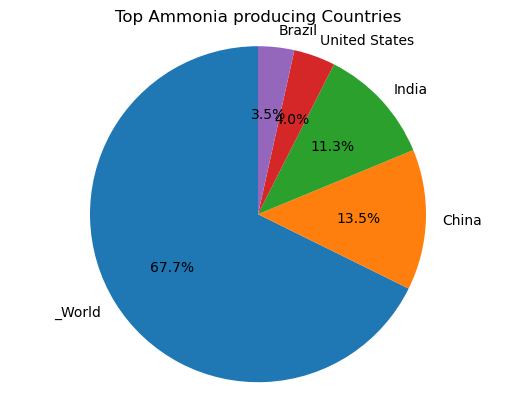

In [9]:
#Sorting the top 5 ammonia producing countries from this dataframe and creating a pie graph from the results
NH4 = df1.groupby('Area')['Ammonia'].sum()

NH4_sorted = NH4.sort_values(ascending=False)

NH4_top = NH4_sorted.head(5)

plt.pie(NH4_top, labels = NH4_top.index, autopct = '%1.1f%%', startangle = 90)

plt.title('Top Ammonia producing Countries')

plt.axis('equal')

plt.show()

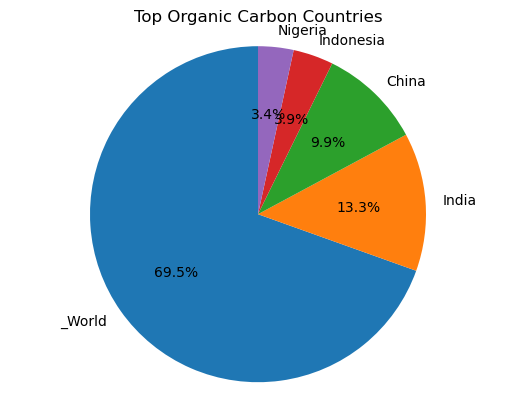

In [10]:
#Sorting the top 5 organic carbon producing countries from this dataframe and creating a pie graph from the results

OC = df1.groupby('Area')['Organic Carbon'].sum()

OC_sorted = OC.sort_values(ascending=False)

OC_top = OC_sorted.head(5)

plt.pie(OC_top, labels = OC_top.index, autopct = '%1.1f%%', startangle = 90)

plt.title('Top Organic Carbon Countries')

plt.axis('equal')

plt.show()

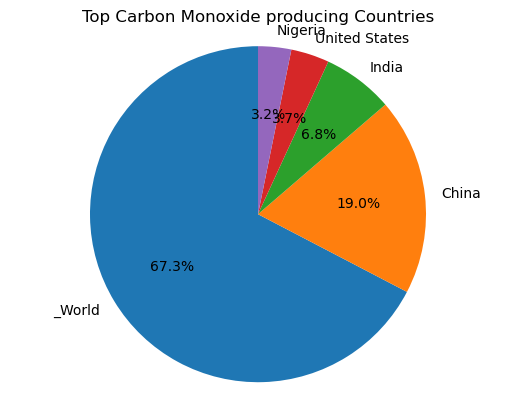

In [11]:
#Sorting the top 5 carbon monoxide producing countries from this dataframe and creating a pie graph from the results

CM = df1.groupby('Area')['Carbon Monoxide'].sum()

CM_sorted = CM.sort_values(ascending=False)

CM_top = CM_sorted.head(5)

plt.pie(CM_top, labels = CM_top.index, autopct = '%1.1f%%', startangle = 90)

plt.title('Top Carbon Monoxide producing Countries')

plt.axis('equal')

plt.show()

In [12]:
#Importing a second dataset using the read.csv function 
c02_2019 = pd.read_csv('C:/Users/seanf/OneDrive/UCDPA_Data_Analytics/CO2_emission.csv')
c02_2019.head()

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2019.1
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,...,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,0.159824
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,...,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,0.792137
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,1.692248
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,...,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217,6.481217


In [13]:
#Renaming columns which I will require further on
c02_2019.rename(columns={"Country Name": "Area", '2019' : 'Carbon Dioxide'}, inplace=True)
c02_2019.head()

,Area,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,Carbon Dioxide,2019.1
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,...,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,0.159824
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,...,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,0.792137
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,1.692248
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,...,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217,6.481217


In [14]:
#Only keeping two columns from the dataset
c02_2019_df = c02_2019[['Area', 'Carbon Dioxide']]

In [15]:
c02_2019_df

,Area,Carbon Dioxide
0,Aruba,NaN
1,Afghanistan,0.159824
2,Angola,0.792137
3,Albania,1.692248
4,Andorra,6.481217
...,...,...
210,Samoa,1.522124
211,"Yemen, Rep.",0.380633
212,South Africa,7.507736
213,Zambia,0.380717


In [16]:
c02_2019_df.info

<bound method DataFrame.info of              Area  Carbon Dioxide
0           Aruba             NaN
1     Afghanistan        0.159824
2          Angola        0.792137
3         Albania        1.692248
4         Andorra        6.481217
..            ...             ...
210         Samoa        1.522124
211   Yemen, Rep.        0.380633
212  South Africa        7.507736
213        Zambia        0.380717
214      Zimbabwe        0.802979

[215 rows x 2 columns]>

In [17]:
#Checking for null values in the dataset
c02_2019_df.isnull().sum()

Area               0
Carbon Dioxide    24
dtype: int64

In [18]:
#Removing null values from the dataset
c02_2019_df_dropped_na = c02_2019_df.dropna()
c02_2019_df_dropped_na.isnull().sum()

Area              0
Carbon Dioxide    0
dtype: int64

In [27]:
#Filtering the top 10 Carbon dioxide producing Areas from the dataset
c02_2019_df_dropped_na1 = c02_2019_df_dropped_na.groupby('Area')['Carbon Dioxide'].sum()

c02_2019_df_dropped_na1_sorted = c02_2019_df_dropped_na1.sort_values(ascending=False)

c02_2019_df_dropped_na1_top = c02_2019_df_dropped_na1_sorted.head(10)

c02_2019_df_dropped_na1_top.info

<bound method Series.info of Area
Qatar                   32.474469
Kuwait                  22.022416
Bahrain                 20.266103
United Arab Emirates    19.329563
Brunei Darussalam       16.132159
Canada                  15.430613
Luxembourg              15.306427
Saudi Arabia            15.284579
Oman                    15.282436
Australia               15.238267
Name: Carbon Dioxide, dtype: float64>

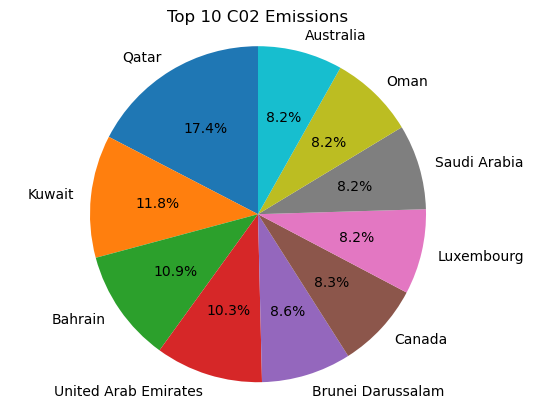

In [20]:
#Creating a pie graph of the top 10 carbon dioxide producing countries
plt.pie(c02_2019_df_dropped_na1_top, labels=c02_2019_df_dropped_na1_top.index, autopct='%1.1f%%', startangle=90)

plt.title('Top 10 C02 Emissions')

plt.axis('equal')

plt.show()

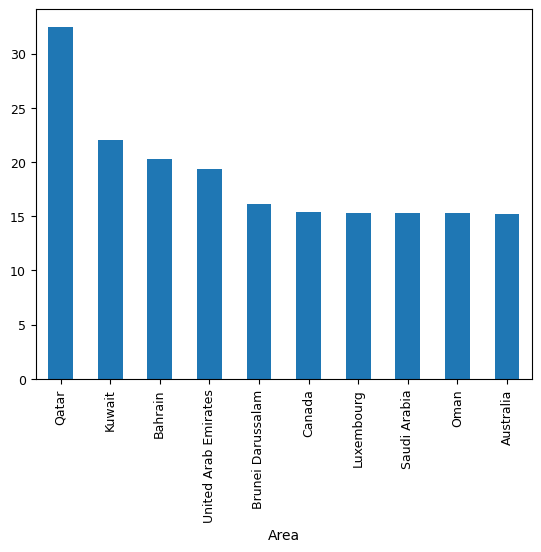

In [40]:
#Creating a bar graph of the top 10 carbon dioxide producing countires
bargraph = c02_2019_df_dropped_na1_top.plot.bar(x = 'Area', y = 'Carbon Dioxide', fontsize='9')

In [44]:
#Renaming a dataframe
df2 = c02_2019_df_dropped_na
df2

,Area,Carbon Dioxide
1,Afghanistan,0.159824
2,Angola,0.792137
3,Albania,1.692248
4,Andorra,6.481217
5,United Arab Emirates,19.329563
...,...,...
210,Samoa,1.522124
211,"Yemen, Rep.",0.380633
212,South Africa,7.507736
213,Zambia,0.380717


In [23]:
df1

,Area,Organic Carbon,Carbon Monoxide,Ammonia
0,_World,13568072.79,5.272669e+08,61420591.28
1,Afghanistan,42136.77,1.055394e+06,185026.85
2,Albania,2645.76,5.095350e+04,44259.67
3,Algeria,92518.06,7.195098e+05,113819.64
4,American Samoa,27.00,6.719900e+02,178.32
...,...,...,...,...
211,Vietnam,226891.68,1.170892e+07,667801.76
212,Wallis and Futuna,23.67,3.690400e+02,205.20
213,Yemen,6447.93,1.561796e+05,96966.02
214,Zambia,80081.84,1.899273e+06,160141.44


In [49]:
#Merging the two dataframes on the area column
df3 = pd.merge(df2, df1, how="left", on=["Area"])
df3

,Area,Carbon Dioxide,Organic Carbon,Carbon Monoxide,Ammonia
0,Afghanistan,0.159824,42136.77,1055394.01,185026.85
1,Angola,0.792137,63480.04,2134641.75,174625.63
2,Albania,1.692248,2645.76,50953.50,44259.67
3,Andorra,6.481217,NaN,NaN,NaN
4,United Arab Emirates,19.329563,6776.29,917063.12,22762.02
...,...,...,...,...,...
186,Samoa,1.522124,278.31,4851.74,2047.35
187,"Yemen, Rep.",0.380633,NaN,NaN,NaN
188,South Africa,7.507736,165563.78,6624304.62,350476.14
189,Zambia,0.380717,80081.84,1899273.01,160141.44


In [50]:
#Checking the new merged datframe for any null values
df3.isnull().sum()

Area                0
Carbon Dioxide      0
Organic Carbon     27
Carbon Monoxide    27
Ammonia            27
dtype: int64

In [56]:
#Removing any null values from the dataframe
df3_na = df3.dropna()
df3_na.isnull().sum()

Area               0
Carbon Dioxide     0
Organic Carbon     0
Carbon Monoxide    0
Ammonia            0
dtype: int64

In [57]:
#Checking for any duplicated values in the merged dataframe
duplicates1 = df3_na.duplicated()
sum(duplicates)

0

In [70]:
df3_na

,Area,Carbon Dioxide,Organic Carbon,Carbon Monoxide,Ammonia
143,Qatar,32.474469,3386.47,168551.48,9048.65
94,Kuwait,22.022416,2869.89,139993.59,20442.50
17,Bahrain,20.266103,564.62,258296.82,2102.03
4,United Arab Emirates,19.329563,6776.29,917063.12,22762.02
29,Canada,15.430613,68779.08,5582268.10,488018.90
...,...,...,...,...,...
124,Niger,0.092232,35660.77,578135.11,164338.20
121,Malawi,0.077837,56905.56,510124.27,96500.61
11,Burundi,0.062443,38753.82,418094.38,46783.51
28,Central African Republic,0.050578,16814.13,155332.08,53925.73


In [121]:
#Sorting the 5 highest Ammonia producing countries and creating a bar chart using seaborn
df3_na.sort_values(by=['Ammonia'], inplace = True, ascending = False)

C:\Users\seanf\AppData\Local\Temp\ipykernel_7188\130878161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_na.sort_values(by=['Ammonia'], inplace = True, ascending = False)


<Axes: xlabel='Area', ylabel='Ammonia'>

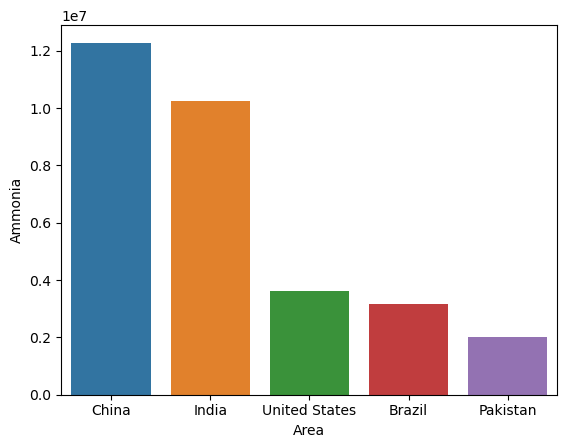

In [122]:
sns.barplot(data=df3_na.head(5), x="Area", y="Ammonia")

In [111]:
#Sorting the countries with the lowest recorded C02 emissions and plotting them in a pie graph
c02_2019_df_dropped_na1_asc = df3_na.groupby('Area')['Carbon Dioxide'].sum()

c02_2019_df_dropped_na1_asc_sorted = c02_2019_df_dropped_na1_asc.sort_values(ascending=True)

c02_2019_df_dropped_na1_asc_top = c02_2019_df_dropped_na1_asc_sorted.head(10)

c02_2019_df_dropped_na1_asc_top.info

<bound method Series.info of Area
Somalia                     0.044681
Central African Republic    0.050578
Burundi                     0.062443
Malawi                      0.077837
Niger                       0.092232
Rwanda                      0.105330
Sierra Leone                0.115190
Uganda                      0.132371
Chad                        0.141093
Madagascar                  0.152766
Name: Carbon Dioxide, dtype: float64>

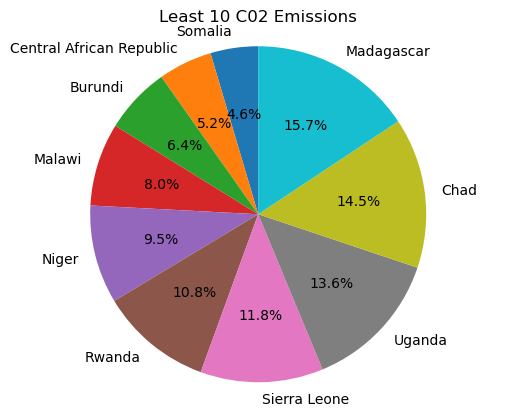

In [115]:
plt.pie(c02_2019_df_dropped_na1_asc_top, labels=c02_2019_df_dropped_na1_asc_top.index, autopct='%1.1f%%', startangle=90)

plt.title('Least 10 C02 Emissions')

plt.axis('equal')

plt.show()

In [118]:
#Descriptive statistics for the merged dataframe
df3_na.describe()

,Carbon Dioxide,Organic Carbon,Carbon Monoxide,Ammonia
count,164.000000,1.640000e+02,1.640000e+02,1.640000e+02
mean,4.081757,7.627751e+04,2.983372e+06,3.460961e+05
std,4.818598,2.667514e+05,1.276512e+07,1.307073e+06
min,0.044681,1.190000e+00,8.550000e+00,3.960000e+00
25%,0.749009,4.100100e+03,1.396041e+05,1.701107e+04
50%,2.781677,1.657857e+04,5.118092e+05,6.484282e+04
75%,5.322106,5.132957e+04,1.632718e+06,1.669468e+05
max,32.474469,2.597600e+06,1.484472e+08,1.227707e+07


In [123]:
#Added each column to create a total emissions column
df3_na['Total Emissions'] =  df3_na[['Carbon Dioxide', 'Organic Carbon', 'Carbon Monoxide', 'Ammonia']].sum(axis=1)

C:\Users\seanf\AppData\Local\Temp\ipykernel_7188\3365820145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_na['Total Emissions'] =  df3_na[['Carbon Dioxide', 'Organic Carbon', 'Carbon Monoxide', 'Ammonia']].sum(axis=1)


In [124]:
df3_na

,Area,Carbon Dioxide,Organic Carbon,Carbon Monoxide,Ammonia,Total Emissions
32,China,7.605937,1926778.28,1.484472e+08,12277069.70,1.626511e+08
77,India,1.797620,2597599.93,5.339256e+07,10247139.62,6.623731e+07
180,United States,14.673411,279399.57,2.884336e+07,3628009.15,3.275079e+07
23,Brazil,2.057811,440078.81,1.288870e+07,3151941.09,1.648072e+07
133,Pakistan,0.879965,510743.96,1.370742e+07,2008592.01,1.622676e+07
...,...,...,...,...,...,...
7,Antigua and Barbuda,5.354476,72.32,1.161969e+04,378.88,1.207624e+04
163,Seychelles,6.248400,318.43,7.643960e+03,329.74,8.298378e+03
137,Palau,13.888117,39.31,6.300110e+03,147.65,6.500958e+03
111,Marshall Islands,3.061693,67.89,1.225070e+03,111.64,1.407662e+03


C:\Users\seanf\AppData\Local\Temp\ipykernel_7188\615073573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_na.sort_values(by=['Total Emissions'], inplace = True, ascending = False)


<Axes: xlabel='Area', ylabel='Total Emissions'>

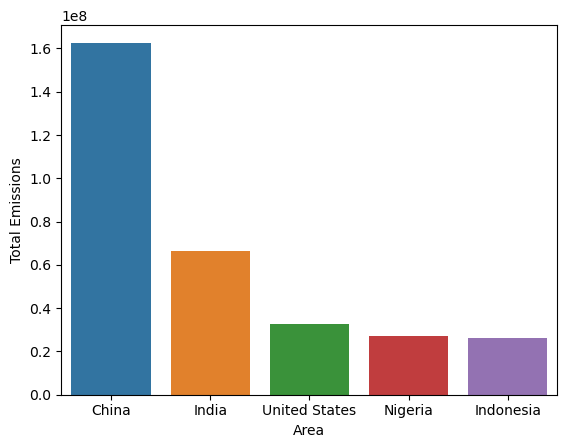

In [128]:
#Bar graph showing the top 5 emission producing countries
df3_na.sort_values(by=['Total Emissions'], inplace = True, ascending = False)
sns.barplot(data=df3_na.head(5), x="Area", y="Total Emissions")

C:\Users\seanf\AppData\Local\Temp\ipykernel_7188\1179092731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_na.sort_values(by=['Total Emissions'], inplace = True, ascending = True)


<Axes: xlabel='Area', ylabel='Total Emissions'>

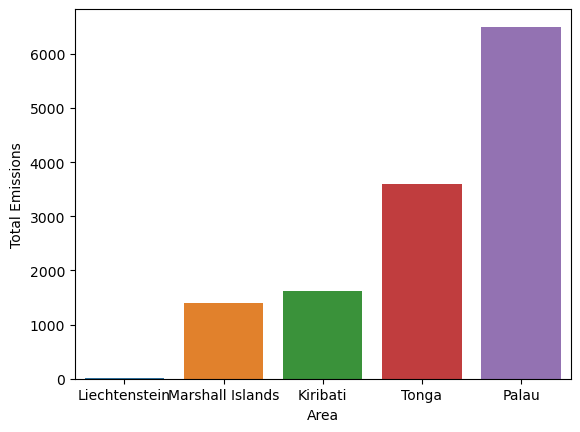

In [127]:
#Bar graph showing the bottom 5 emission producing countries

df3_na.sort_values(by=['Total Emissions'], inplace = True, ascending = True)
sns.barplot(data=df3_na.head(5), x="Area", y="Total Emissions")